In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
cleveland = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None)

hungarian = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header=None)

switzerland = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header=None)

va = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header=None)

In [3]:
files = [cleveland, hungarian, switzerland, va]

newData = pd.concat(files, sort=False, axis=0, ignore_index=True)
newData.to_csv(r'X:\\Data Mining\\finalproject\\\\finalpaper\\processed_data.csv', index=False)
newData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
cols = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

data = pd.read_csv("X:\\Data Mining\\finalproject\\\\finalpaper\\processed_data.csv", names = cols)
data.drop(0, axis=0, inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.replace('?', np.nan, inplace=True)
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing
# data.isnull().head(400)

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [6]:
df = data.loc[:, data.isnull().mean() < .33]
data = df.dropna()

In [7]:
data['chol'].replace('0', np.nan, inplace=True)

c:\users\sshas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
data['num'].values[data['num'].values > 0] = 1
data.rename(columns={'num': 'target'}, inplace=True)
data

c:\users\sshas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
914,62.0,1.0,4.0,158,170,0,1,138,1,0,1
915,46.0,1.0,4.0,134,310,0,0,126,0,0,1
916,54.0,0.0,4.0,127,333,1,1,154,0,0,1
918,55.0,1.0,4.0,122,223,1,1,100,0,0,1


In [9]:
data.to_csv(r'X:\\Data Mining\\finalproject\\\\finalpaper\\processed_data.csv', index=False)

In [10]:
df = pd.read_csv('processed_data.csv')

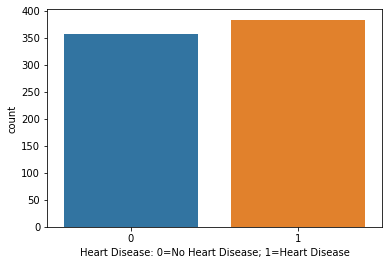

In [11]:
sns.countplot(x="target", data=df)
plt.xlabel('Heart Disease: 0=No Heart Disease; 1=Heart Disease')
# plt.savefig('heartDisease.png')
plt.show()

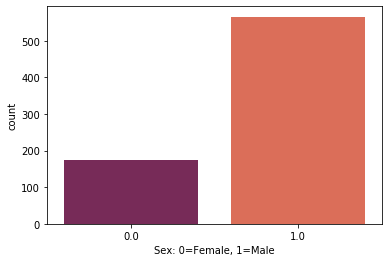

In [12]:
sns.countplot(x="sex", data=df, palette='rocket')
plt.xlabel('Sex: 0=Female, 1=Male')
# plt.savefig('Gender.png')
plt.show()

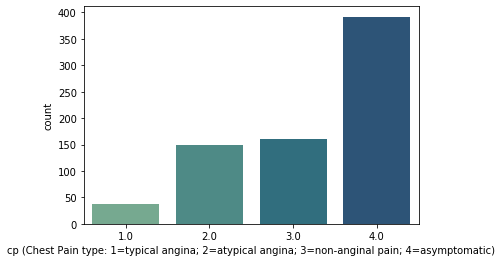

In [13]:
sns.countplot(x='cp', data=df, palette='crest')
plt.xlabel("cp (Chest Pain type: 1=typical angina; 2=atypical angina; 3=non-anginal pain; 4=asymptomatic)")
# plt.savefig('ChestPain.png')
plt.show()

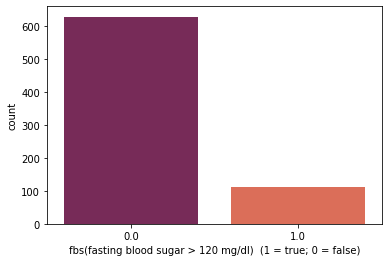

In [14]:
sns.countplot(x="fbs", data=df, palette='rocket')
plt.xlabel('fbs(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)')
# plt.savefig('fbs.png')
plt.show()

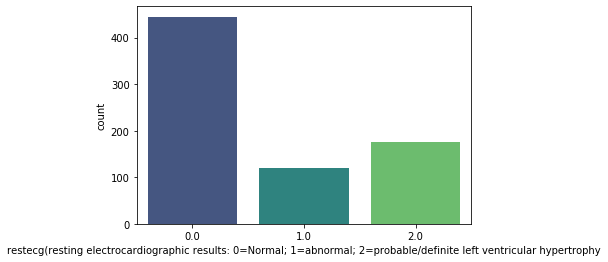

In [15]:
sns.countplot(x="restecg", data=df, palette='viridis')
plt.xlabel('restecg(resting electrocardiographic results: 0=Normal; 1=abnormal; 2=probable/definite left ventricular hypertrophy')
# plt.savefig('restecg.png')
plt.show()

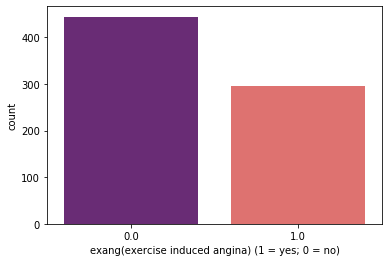

In [16]:
sns.countplot(x="exang", data=df, palette='magma')
plt.xlabel('exang(exercise induced angina) (1 = yes; 0 = no)')
# plt.savefig('exang.png')
plt.show()

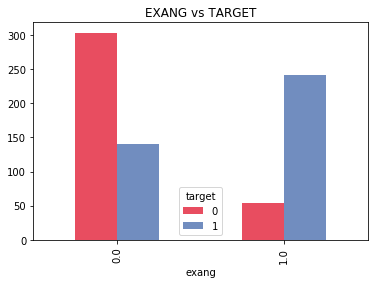

In [17]:
pd.crosstab(df.exang,df.target).plot(kind="bar", color=['#e84d60', '#718dbf'])
# plt.savefig('exangvstarget.png')
plt.title('EXANG vs TARGET')
plt.show()

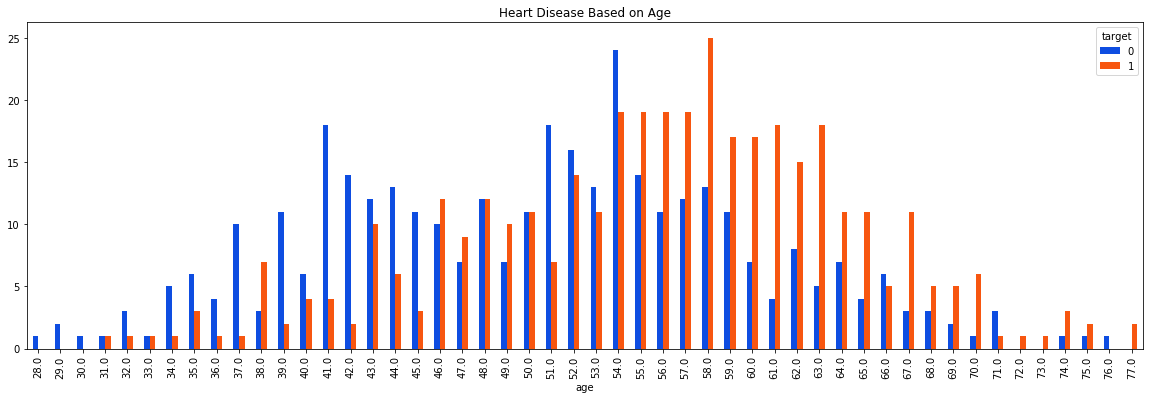

In [18]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6), color=['#0E4DE1', '#F75610'])
plt.title('Heart Disease Based on Age')
# plt.savefig('agevstarget.png')
plt.show()

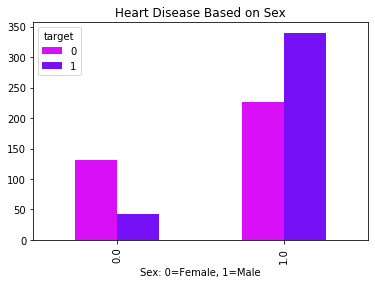

In [19]:
pd.crosstab(df.sex,df.target).plot(kind="bar", color=['#D910F7', '#7510F7'])
plt.xlabel('Sex: 0=Female, 1=Male')
plt.title('Heart Disease Based on Sex')
# plt.savefig('gendervstarget.png')
plt.show()

In [20]:
y = df['target'].values
x_ = df.drop('target',axis=1)

In [21]:
# Min Max Normalization
x = (x_ - np.min(x_)) / (np.max(x_)) - (np.min(x_))
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,-27.545455,1.0,-1.00,0.725,-84.754561,1.0,1.0,-59.554455,0.0,1.532258
1,-27.493506,1.0,-0.25,0.800,-84.666667,0.0,1.0,-59.762376,1.0,1.403226
2,-27.493506,1.0,-0.25,0.600,-84.761194,0.0,1.0,-59.658416,1.0,1.580645
3,-27.883117,1.0,-0.50,0.650,-84.726368,0.0,0.0,-59.371287,0.0,1.725806
4,-27.831169,0.0,-0.75,0.650,-84.802653,0.0,1.0,-59.445545,0.0,1.387097
...,...,...,...,...,...,...,...,...,...,...
735,-27.558442,1.0,-0.25,0.790,-84.859038,0.0,0.5,-59.613861,1.0,1.161290
736,-27.766234,1.0,-0.25,0.670,-84.626866,0.0,0.0,-59.673267,0.0,1.161290
737,-27.662338,0.0,-0.25,0.635,-84.588723,1.0,0.5,-59.534653,0.0,1.161290
738,-27.649351,1.0,-0.25,0.610,-84.771144,1.0,0.5,-59.801980,0.0,1.161290


In [22]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
x_train['chol'].fillna(x_train['chol'].mean(), inplace=True)
x_test['chol'].fillna(x_test['chol'].mean(), inplace=True)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

modelAccuracy = {}

c:\users\sshas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


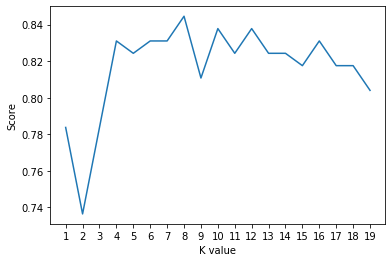

Maximum KNN Score is 84.46%


In [23]:
# K-Nearest Neighbhours Classfier
# Finding the best K
bestKScore = []
for K in range(1,20):
    knn_clf = KNeighborsClassifier(n_neighbors = K, p=1) # p=1 is Euclidean Distance
    knn_clf.fit(x_train.T, y_train.T)
    bestKScore.append(knn_clf.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), bestKScore)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(bestKScore)*100
modelAccuracy['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# knn2 = KNeighborsClassifier(p=2)
# param_grid = {'n_neighbors': np.arange(1, 25)}
# knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
# knn_gscv.fit(x_train.T, y_train.T)
# knn_gscv.best_params_
# knn_gscv.score

In [24]:
# Logistic Regression Model
lr = LogisticRegression(solver='lbfgs',random_state=0, max_iter=1000)
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100
modelAccuracy['Logistic Regression'] = acc
print("Accuracy of Logistic Regression {:.2f}%".format(acc))

Accuracy of Logistic Regression 81.08%


In [25]:
# Support Vector Machine
svm = SVC(random_state = 1, gamma='auto')
svm.fit(x_train.T, y_train.T)
acc = svm.score(x_test.T,y_test.T)*100
modelAccuracy['SVM'] = acc
print("Accuracy of Support Vector Machine {:.2f}%".format(acc))

Accuracy of Support Vector Machine 81.08%


In [26]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
acc = nb.score(x_test.T,y_test.T)*100
modelAccuracy['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.11%


In [27]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train.T, y_train.T)
# tree.plot_tree(dtc)
acc = dtc.score(x_test.T, y_test.T)*100
modelAccuracy['Decision Tree'] = acc
print("Accuracy of Decision Trees: {:.2f}%".format(acc))

Accuracy of Decision Trees: 73.65%


In [28]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
acc = rf.score(x_test.T,y_test.T)*100
modelAccuracy['Random Forest'] = acc
print("Accuracy of Random Forest: {:.2f}%".format(acc))

Accuracy of Random Forest: 81.08%


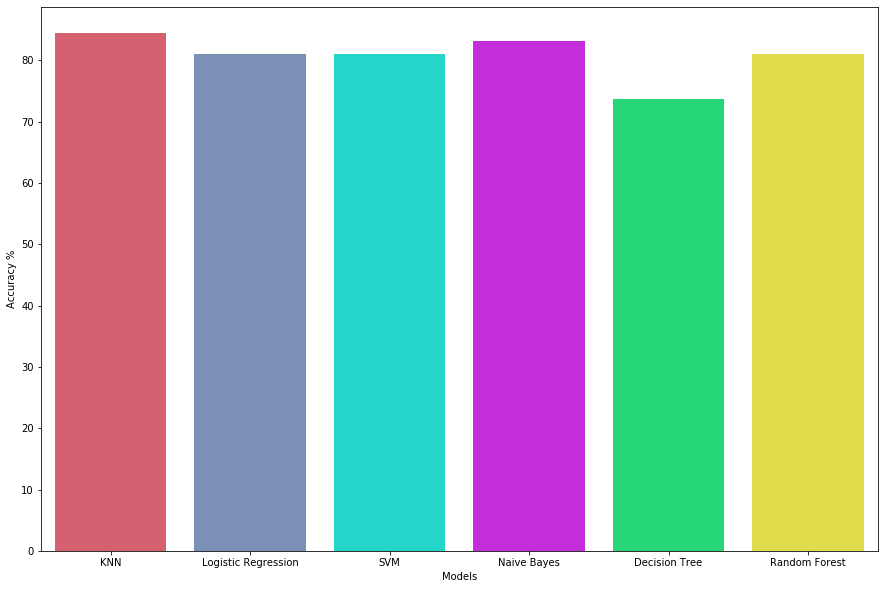

In [29]:
# Model Comparision
plt.figure(figsize=(15,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Models")
sns.barplot(x=list(modelAccuracy.keys()), y=list(modelAccuracy.values()), palette=["#e84d60", "#718dbf", "#08F2E2", "#D910F7","#09F377","#F9F232"])
plt.show()

In [30]:
# Predicted values
pred_lr_y = lr.predict(x_test.T)
# print('Logistic Regression Test:',pred_lr_y[0:15])
pred_knn_y = knn_clf.predict(x_test.T)
# pred_knn_y = knn_gscv.predict(x_test.T)
# print('KNN Test:',pred_knn_y[0:15])
pred_svm_y = svm.predict(x_test.T)
# print('SVM Test:',pred_svm_y[0:15])
pred_nb_y = nb.predict(x_test.T)
# print('Naive Bayes Test:',pred_nb_y[0:15])
pred_dtc_y = dtc.predict(x_test.T)
# print('Decision Tree Test:',pred_dtc_y[0:15])
pred_rf_y = rf.predict(x_test.T)
# print('Random Forest:',pred_rf_y[0:15])

In [31]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test,pred_lr_y)
cm_knn = confusion_matrix(y_test,pred_knn_y)
cm_svm = confusion_matrix(y_test,pred_svm_y)
cm_nb = confusion_matrix(y_test,pred_nb_y)
cm_dtc = confusion_matrix(y_test,pred_dtc_y)
cm_rf = confusion_matrix(y_test,pred_rf_y)

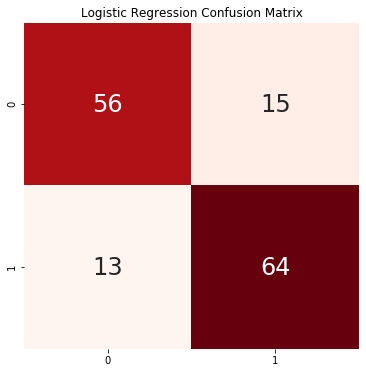

In [32]:
fig_x = 24
fig_y = 15
plt.figure(figsize=(fig_x,fig_y))

plt.subplots_adjust(wspace = 0.5, hspace= 0.5)
#Logistic Regression Confusion Matrix
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
# sns.heatmap(cm_lr,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
ax = sns.heatmap(cm_lr, annot=True, cbar=False, annot_kws={"size": 24}, cmap="Reds")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

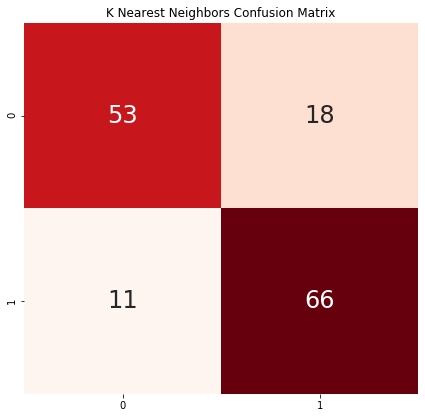

In [33]:
#K Nearest Neighbors Confusion Matrix
plt.figure(figsize=(fig_x,fig_y))
plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
ax = sns.heatmap(cm_knn, annot=True, cbar=False, annot_kws={"size": 24}, cmap="Reds")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

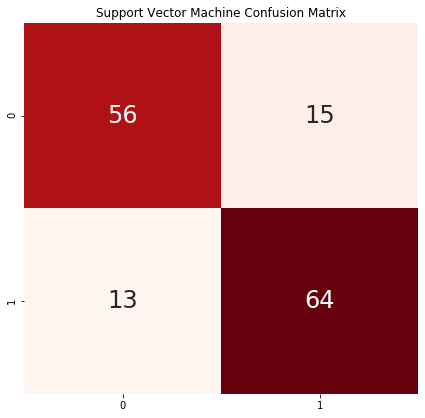

In [34]:
#Support Vector Machine Confusion Matrix
plt.figure(figsize=(fig_x,fig_y))
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
ax = sns.heatmap(cm_svm, annot=True, cbar=False, annot_kws={"size": 24}, cmap="Reds")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

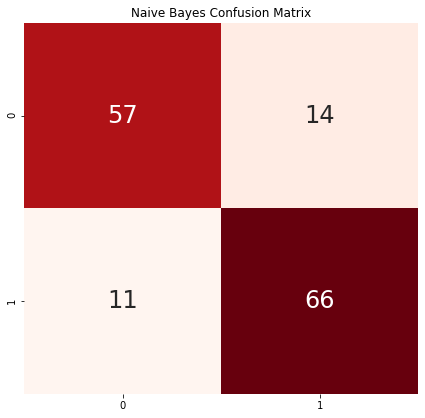

In [35]:
#Naive Bayes Confusion Matrix
plt.figure(figsize=(fig_x,fig_y))
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
ax = sns.heatmap(cm_nb, annot=True, cbar=False, annot_kws={"size": 24}, cmap="Reds")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

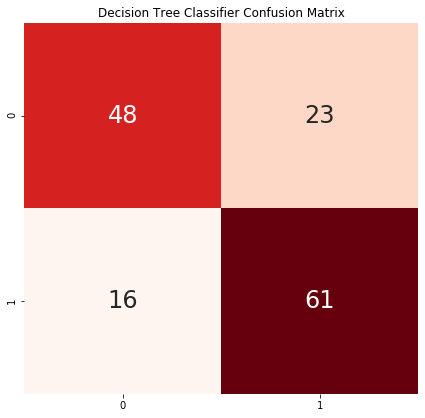

In [36]:
#
plt.figure(figsize=(fig_x,fig_y))
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
ax = sns.heatmap(cm_dtc, annot=True, cbar=False, annot_kws={"size": 24}, cmap="Reds")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

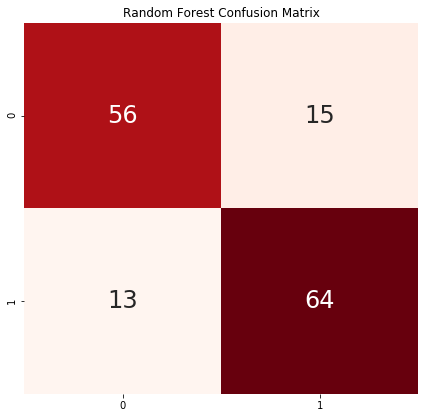

In [37]:
plt.figure(figsize=(fig_x,fig_y))
plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
ax = sns.heatmap(cm_rf, annot=True, cbar=False, annot_kws={"size": 24}, cmap="Reds")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()